In [5]:
import pandas as pd
# Reading data
vehicles = pd.read_csv('/home/tuandinh/Desktop/MachineLearning/Tutorial/dataset/Car data/car data.csv')
vehicles.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# Check if the data is missing something and the type of information
vehicles.info()
# or using vehicles.isnull().sum()
vehicles.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### We have a beautiful analysis of our numerical columns which gives us the count,mean,std and other such values to have a clear idea of the values in our dataset. Helps in scaling!

In [7]:
vehicles.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#### Price based on different engine types
+ You can see that the price of a diesel car has the highest price

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

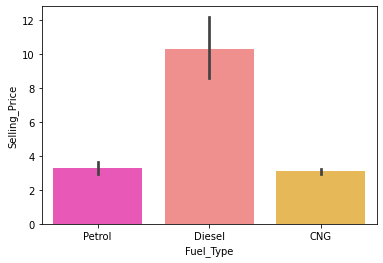

In [11]:
import seaborn as sns
sns.barplot(x='Fuel_Type', y = 'Selling_Price', data= vehicles, palette='spring')

#### Visualizing the relationship between Target Variable[Selling price] against Kms Driven,Present_Price and Vehicle age :

<Figure size 1080x1080 with 0 Axes>

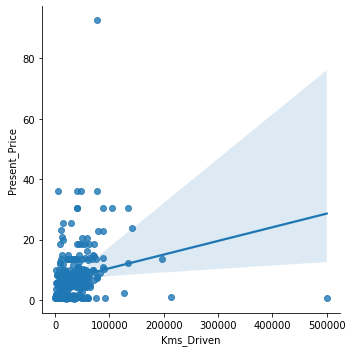

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.lmplot(x = 'Kms_Driven', y = 'Present_Price',data=vehicles, col_order='blue blood')

#### Convert categorical features to numerics type. I using "get_dummies()" in library "pandas"

In [17]:
# drop_first = True rất quan trọng khi sử dụng, vì nó giúp giảm bớt cột thừa được tạo trong quá trình tạo biến giả. 
vehicles = pd.get_dummies(vehicles, columns=['Fuel_Type','Seller_Type','Transmission'], drop_first= True)
#dropping the Year column since it becomes redundant and irrelevant after Vehicle_Age column
vehicles.drop(columns=['Year'],inplace=True)
#check out the dataset with new changes
vehicles.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,0,1,0,1
1,sx4,4.75,9.54,43000,0,1,0,0,1
2,ciaz,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2.85,4.15,5200,0,0,1,0,1
4,swift,4.60,6.87,42450,0,1,0,0,1


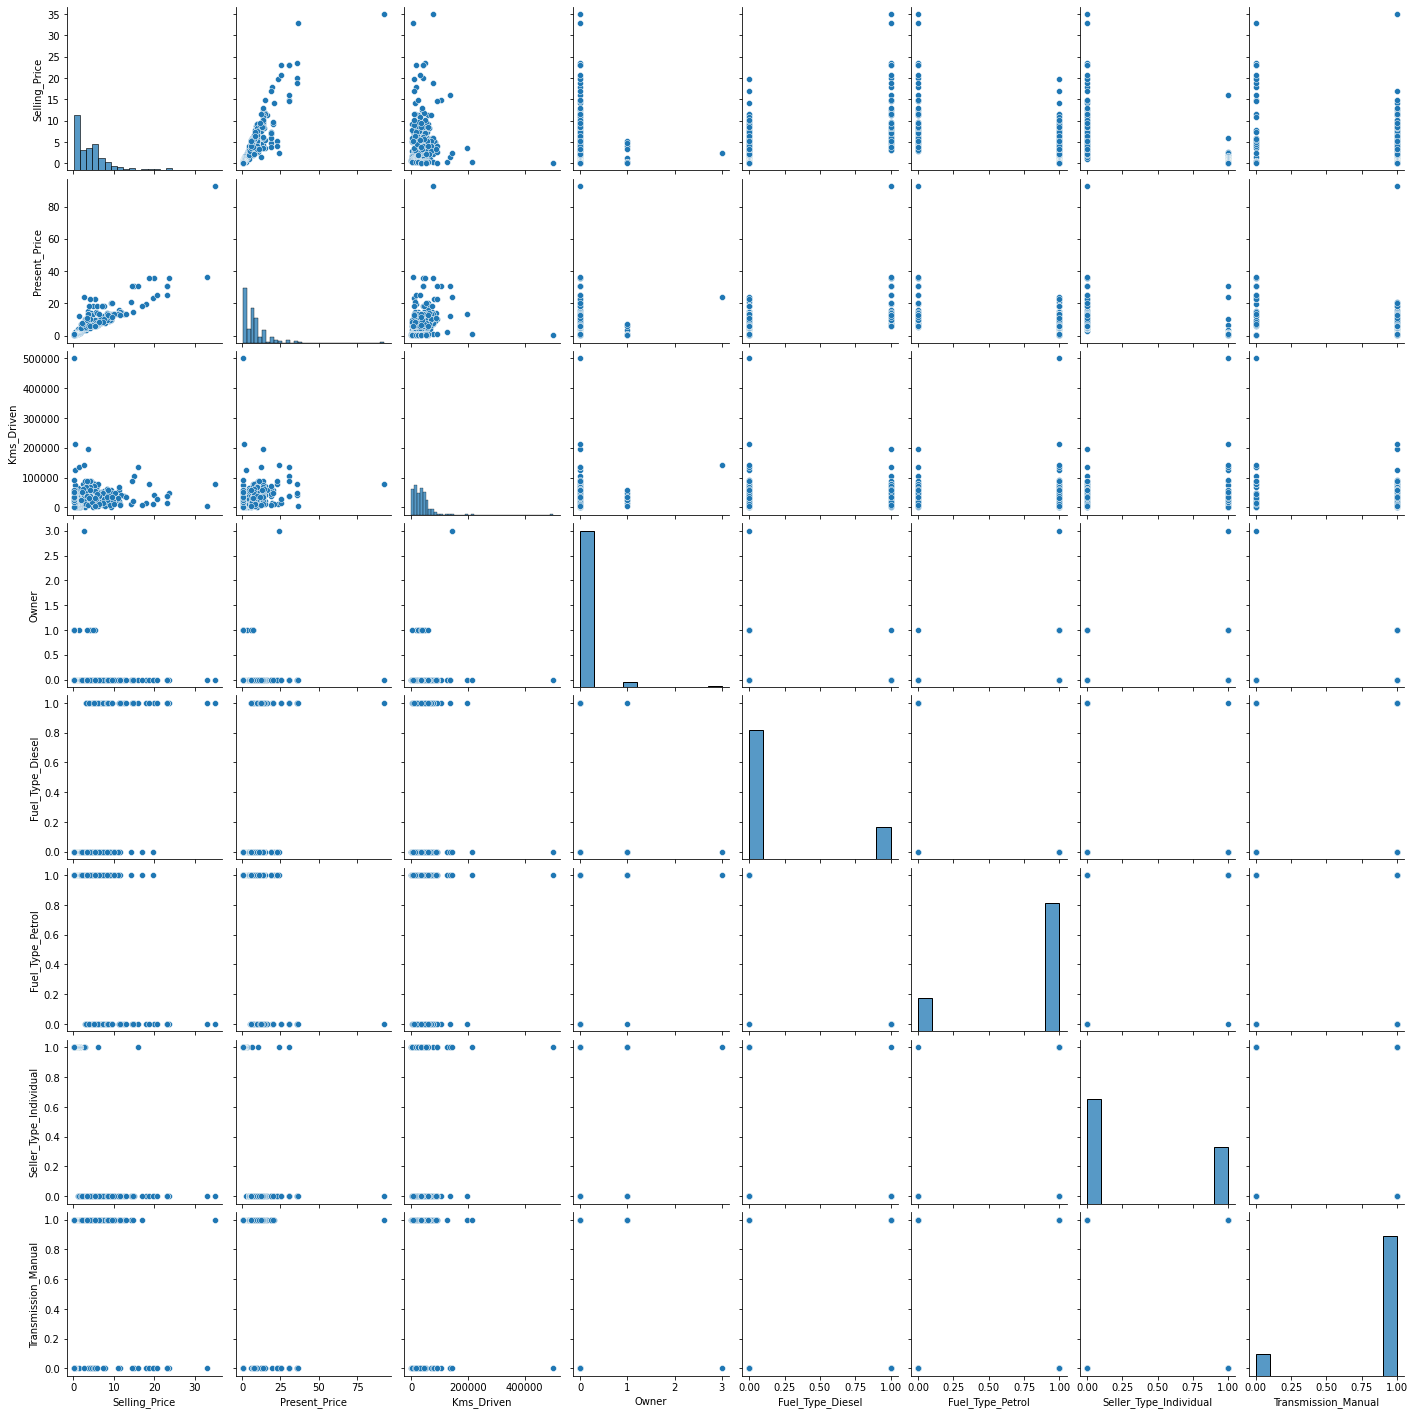

In [18]:
sns.pairplot(vehicles)

### **Trainning model with Linear Regression**

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(0)

vehicles_train, vehicles_test = train_test_split(vehicles, test_size=0.2, train_size=0.8, random_state=100)
# We'll perform feature scaling to ensure normalization of the data within a particular range.
#Sometimes, it also helps in speeding up the calculations in an algorithm.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# features need to scale
var = ['Selling_Price','Present_Price', 'Kms_Driven']
#scaling the training data(fitting the parameters and transforming the values)
vehicles_train[var] = scaler.fit_transform(vehicles_train[var])
#transforming the test data.We avoid fitting the values to prevent data leakage!
vehicles_test[var] = scaler.transform(vehicles_test[var])
# drop name of Car because it can't use in Linear Regression
X_test = vehicles_test.drop(columns = ['Car_Name','Selling_Price'])
y_test=vehicles_test['Selling_Price']

X_train=vehicles_train.drop(columns=['Car_Name','Selling_Price'],axis=1)
y_train=vehicles_train['Selling_Price']


#### **Create the model**

In [21]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

#### **Prediction**

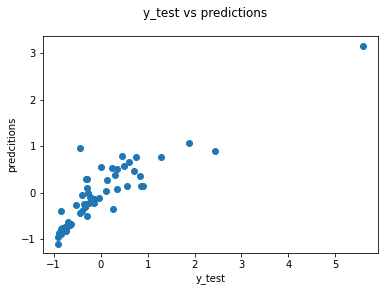

In [22]:
predictions=lm.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)